In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user_name, password, host
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [2]:
#Acquire

In [3]:
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user_name}:{password}@{host}/{db_name}'

#Create query to get necessary data
def telco_data():
    '''
    This function reads in the telcoco data from the Codeup db
    and returns a pandas DataFrame with all columns and it was joined with other tables.
    '''
    sql_query = '''
    Select * from customers
    join contract_types on contract_types.contract_type_id = customers.contract_type_id
    join payment_types on payment_types.payment_type_id = customers.payment_type_id
    join internet_service_types on internet_service_types.internet_service_type_id = customers.internet_service_type_id
    '''
    return pd.read_sql(sql_query,get_connection('telco_churn'))

In [4]:
telco_df = telco_data()

In [5]:
telco_df.head()

customer_id  gender  senior_citizen partner dependents  tenure  \
0  0002-ORFBO  Female               0     Yes        Yes       9   
1  0003-MKNFE    Male               0      No         No       9   
2  0004-TLHLJ    Male               0      No         No       4   
3  0011-IGKFF    Male               1     Yes         No      13   
4  0013-EXCHZ  Female               1     Yes         No       3   

  phone_service multiple_lines  internet_service_type_id online_security  \
0           Yes             No                         1              No   
1           Yes            Yes                         1              No   
2           Yes             No                         2              No   
3           Yes             No                         2              No   
4           Yes             No                         2              No   

  online_backup device_protection tech_support streaming_tv streaming_movies  \
0           Yes                No          Yes          Yes               No   
1            No                No           No           No              Yes   
2            No               Yes           No           No               No   
3           Yes               Yes           No          Yes              Yes   
4            No                No          Yes          Yes               No   

   contract_type_id paperless_billing  payment_type_id  monthly_charges  \
0                 2               Yes                2             65.6   
1                 1                No                2             59.9   
2                 1               Yes                1             73.9   
3                 1               Yes                1             98.0   
4                 1               Yes                2             83.9   

  total_charges churn  contract_type_id   contract_type  payment_type_id  \
0         593.3    No                 2        One year                2   
1         542.4    No                 1  Month-to-month                2   
2        280.85   Yes                 1  Month-to-month                1   
3       1237.85   Yes                 1  Month-to-month                1   
4         267.4   Yes                 1  Month-to-month                2   

       payment_type  internet_service_type_id internet_service_type  
0      Mailed check                         1                   DSL  
1      Mailed check                         1                   DSL  
2  Electronic check                         2           Fiber optic  
3  Electronic check                         2           Fiber optic  
4      Mailed check                         2           Fiber optic

In [6]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [7]:
telco_df.isna().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type_id            0
contract_type               0
payment_type_id             0
payment_type                0
internet_service_type_id    0
internet_service_type       0
dtype: int64

In [8]:
#We can see the there are some duplicates columns but threre is no duplicates value
telco_df.duplicated().sum()

0

In [13]:
#Need to drop some columns before create a dummy
cols = telco_df.select_dtypes('object').columns.to_list()

In [10]:
cols

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'payment_type',
 'internet_service_type']

In [11]:
dummy_df = pd.get_dummies(telco_df[cols],drop_first=True,dummy_na=False)

In [12]:
dummy_df.head()

customer_id_0003-MKNFE  customer_id_0004-TLHLJ  customer_id_0011-IGKFF  \
0                       0                       0                       0   
1                       1                       0                       0   
2                       0                       1                       0   
3                       0                       0                       1   
4                       0                       0                       0   

   customer_id_0013-EXCHZ  customer_id_0013-MHZWF  customer_id_0013-SMEOE  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       1                       0                       0   

   customer_id_0014-BMAQU  customer_id_0015-UOCOJ  customer_id_0016-QLJIS  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   customer_id_0017-DINOC  customer_id_0017-IUDMW  customer_id_0018-NYROU  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   customer_id_0019-EFAEP  customer_id_0019-GFNTW  customer_id_0020-INWCK  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   customer_id_0020-JDNXP  customer_id_0021-IKXGC  customer_id_0022-TCJCI  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   customer_id_0023-HGHWL  customer_id_0023-UYUPN  customer_id_0023-XUOPT  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   customer_id_0027-KWYKW  customer_id_0030-FNXPP  customer_id_0031-PVLZI  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   customer_id_0032-PGELS  customer_id_0036-IHMOT  customer_id_0040-HALCW  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                   

In [ ]:
#Cleaning

In [17]:
def clean_data(df):
    '''
    This function will drop uneccessary columns or duplicates that is not useful for analysis.  
    change total_charges from object type to a float type. 
    create dummy variables for telco data that have the object type columns and then join with it original telco dataframe. 
    after joining, drop the columns that used to create dummy dataframe.
    and then return original telco dataframe.
    '''

    #clean data

    #drop duplicate rows, if present
    df = df.drop_duplicates()
    #drop most of id columns since it is not useful in analysis
    df = df.drop(columns = ['customer_id','internet_service_type_id','payment_type_id','contract_type_id'])

    #conver total_charges to float
    df['total_charges'] = df.total_charges.replace(' ', '0').astype(float)
    
    #create a dummy df
    col_list = df.select_dtypes('object').columns.to_list()

    #create a dummy df
    for col in col_list:
        dummy_df = pd.get_dummies(df[col],prefix=df[col].name,drop_first=True,dummy_na=False)
    # Concatenate the dummy_df dataframe above with the original df
        df = pd.concat([df, dummy_df], axis=1)
    # drop the columns that we already use to create dummy_df
        df.drop(columns=col, inplace=True)
    
    #drop duplicates columns again
    #df.drop(columns = ['payment_type_id', 'internet_service_type_id','contract_type_id'], inplace=True)
    
    # rename columns
    df = df.rename(columns={'gender_Male':'gender',
                            'dependents_Yes':'dependents',
                            'partner_Yes':'partner',
                            'phone_service_Yes':'one_line',
                            'multiple_lines_No phone service': 'no_phone_service',
                            'multiple_lines_Yes':'multiple_lines', 
                            'online_security_No internet service': 'online_security_with_no_internet service',
                            'online_security_Yes':'online_security',
                            'online_backup_No internet service':'online_backup_with_no_internet service',
                            'online_backup_Yes':'online_backup',
                            'device_protection_No internet service':'device_protection_with_no_internet service',
                            'device_protection_Yes':'device_protection',
                            'tech_support_No internet service':'tech_support_with_no_internet service',
                            'tech_support_Yes':'tech_support',
                            'streaming_tv_No internet service':'streaming_tv_with_no_internet service',
                            'streaming_tv_Yes':'streaming_tv',
                            'streaming_movies_No internet service':'streaming_movies_with_no_internet service',
                            'streaming_movies_Yes':'streaming_movies',
                            'paperless_billing_Yes':'paperless_billing',
                            'churn_Yes':'churn',
                            'contract_type_One year':'one_year',
                            'contract_type_Two year':'two_year',
                            'payment_type_Credit card (automatic)':'Auto_pay',
                            'payment_type_Electronic check':'electronic_check',
                            'payment_type_Mailed check':'mailed_check',
                            'internet_service_type_Fiber optic':'fiber_optic',
                            'internet_service_type_None':'no_internet_service'})
    
    return df

In [18]:
def split_data(df):
    '''
    This function takes in a dataframe and split the data into 3: train, validate and test
    Establish train+validate set 80% of original data and then repeat the process 
    Split train+validate  into train, validate separately 
    '''
    train_validate, test = train_test_split(df, 
                                            test_size=.2, 
                                            random_state=123, 
                                            stratify=df.churn)

    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [19]:
telco_df = clean_data(telco_df)
telco_df.head()

senior_citizen  tenure  monthly_charges  total_charges  gender  partner  \
0               0       9             65.6         593.30       0        1   
1               0       9             59.9         542.40       1        0   
2               0       4             73.9         280.85       1        0   
3               1      13             98.0        1237.85       1        1   
4               1       3             83.9         267.40       0        1   

   dependents  one_line  no_phone_service  multiple_lines  \
0           1         1                 0               0   
1           0         1                 0               1   
2           0         1                 0               0   
3           0         1                 0               0   
4           0         1                 0               0   

   online_security_with_no_internet service  online_security  \
0                                         0                0   
1                                         0                0   
2                                         0                0   
3                                         0                0   
4                                         0                0   

   online_backup_with_no_internet service  online_backup  \
0                                       0              1   
1                                       0              0   
2                                       0              0   
3                                       0              1   
4                                       0              0   

   device_protection_with_no_internet service  device_protection  \
0                                           0                  0   
1                                           0                  0   
2                                           0                  1   
3                                           0                  1   
4                                           0                  0   

   tech_support_with_no_internet service  tech_support  \
0                                      0             1   
1                                      0             0   
2                                      0             0   
3                                      0             0   
4                                      0             1   

   streaming_tv_with_no_internet service  streaming_tv  \
0                                      0             1   
1                                      0             0   
2                                      0             0   
3                                      0             1   
4                                      0             1   

   streaming_movies_with_no_internet service  streaming_movies  \
0                                          0                 0   
1                                          0                 1   
2                                          0                 0   
3                                          0                 1   
4                                          0                 0   

   paperless_billing  churn  one_year  two_year  Auto_pay  electronic_check  \
0                  1      0         1         0         0                 0   
1                  0      0         0         0         0                 0   
2                  1      1         0         0         0                 1   
3                  1      1         0         0         0                 1   
4                  1      1         0         0         0                 0   

   mailed_check  fiber_optic  no_internet_service  
0             1            0                    0  
1             1            0                    0  
2             0            1                    0  
3             0            1                    0  
4             1            1                    0

In [41]:
#Might need to consider drop some columns like  
#online_security_with_no_internet service, device_protection_with_no_internet service,......
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   senior_citizen                              7043 non-null   int64  
 1   tenure                                      7043 non-null   int64  
 2   monthly_charges                             7043 non-null   float64
 3   total_charges                               7043 non-null   float64
 4   gender                                      7043 non-null   uint8  
 5   partner                                     7043 non-null   uint8  
 6   dependents                                  7043 non-null   uint8  
 7   one_line                                    7043 non-null   uint8  
 8   no_phone_service                            7043 non-null   uint8  
 9   multiple_lines                              7043 non-null   uint8  
 10  online_secur

In [21]:
train, validate, test = split_data(telco_df)

In [22]:
print('train shape    :',train.shape)
print('validate shape :',validate.shape)
print('test shape     :',test.shape)

train shape    : (3943, 31)
validate shape : (1691, 31)
test shape     : (1409, 31)


In [ ]:
#Explore

In [114]:
telco_df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [94]:
churn_rate = train['churn'].mean()

In [95]:
print(f'Churn rate: {churn_rate:.2%}')

Churn rate: 26.53%


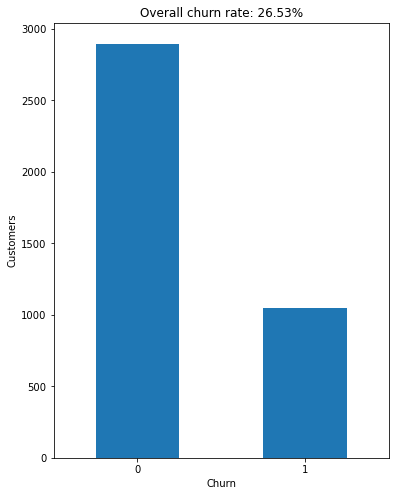

In [11]:
plt.figure(figsize=(6,8))
train.churn.value_counts().plot.bar(rot=0 )
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churn')
plt.ylabel('Customers')

plt.show()

In [39]:
train_corr = train.corr()
train_corr

senior_citizen    tenure  \
senior_citizen                                    1.000000  0.021272   
tenure                                            0.021272  1.000000   
monthly_charges                                   0.220297  0.253502   
total_charges                                     0.104086  0.826644   
gender                                            0.004424 -0.009337   
partner                                           0.022743  0.385079   
dependents                                       -0.206147  0.167668   
one_line                                          0.010498  0.008510   
no_phone_service                                 -0.010498 -0.008510   
multiple_lines                                    0.141087  0.330764   
online_security_with_no_internet service         -0.184221 -0.044935   
online_security                                  -0.027093  0.325176   
online_backup_with_no_internet service           -0.184221 -0.044935   
online_backup                                     0.082438  0.366900   
device_protection_with_no_internet service       -0.184221 -0.044935   
device_protection                                 0.059878  0.370069   
tech_support_with_no_internet service            -0.184221 -0.044935   
tech_support                                     -0.052915  0.319004   
streaming_tv_with_no_internet service            -0.184221 -0.044935   
streaming_tv                                      0.108692  0.291585   
streaming_movies_with_no_internet service        -0.184221 -0.044935   
streaming_movies                                  0.119603  0.273170   
paperless_billing                                 0.156970  0.012484   
churn                                             0.137998 -0.346061   
one_year                                         -0.037158  0.202589   
two_year                                         -0.119107  0.559651   
Auto_pay                                         -0.026293  0.225430   
electronic_check                                  0.166820 -0.213188   
mailed_check                                     -0.161532 -0.247185   
fiber_optic                                       0.248774  0.028064   
no_internet_service                              -0.184221 -0.044935   

                                            monthly_charges  total_charges  \
senior_citizen                                     0.220297       0.104086   
tenure                                             0.253502       0.826644   
monthly_charges                                    1.000000       0.655865   
total_charges                                      0.655865       1.000000   
gender                                            -0.014260      -0.004626   
partner                                            0.111287       0.330014   
dependents                                        -0.116904       0.069458   
one_line                                           0.245734       0.113085   
no_phone_service                                  -0.245734      -0.113085   
multiple_lines                                     0.495375       0.473081   
online_security_with_no_internet service          -0.765786      -0.379117   
online_security                                    0.309024       0.416498   
online_backup_with_no_internet service            -0.765786      -0.379117   
online_backup                                      0.449610       0.516631   
device_protection_with_no_internet service        -0.765786      -0.379117   
device_protection                                  0.489726       0.531339   
tech_support_with_no_internet service             -0.765786      -0.379117   
tech_support                                       0.336950       0.423984   
streaming_tv_with_no_internet service             -0.765786      -0.379117   
streaming_tv                                       0.638746       0.528560   
streaming_movies_with_no_internet service         -0.765786      -0.379117   
streaming_movies       

In [27]:
#calculate the correlation of all columns in the train dataset.
train_corr = train.corr()
cols = train_corr['churn'].sort_values(ascending=False)
cols

churn                                         1.000000
fiber_optic                                   0.304280
electronic_check                              0.297440
monthly_charges                               0.188742
paperless_billing                             0.188292
senior_citizen                                0.137998
streaming_movies                              0.062038
streaming_tv                                  0.060303
multiple_lines                                0.033437
one_line                                      0.009568
gender                                        0.000669
no_phone_service                             -0.009568
device_protection                            -0.068312
mailed_check                                 -0.078254
online_backup                                -0.088072
Auto_pay                                     -0.126973
tech_support                                 -0.150712
partner                                      -0.158691
online_sec

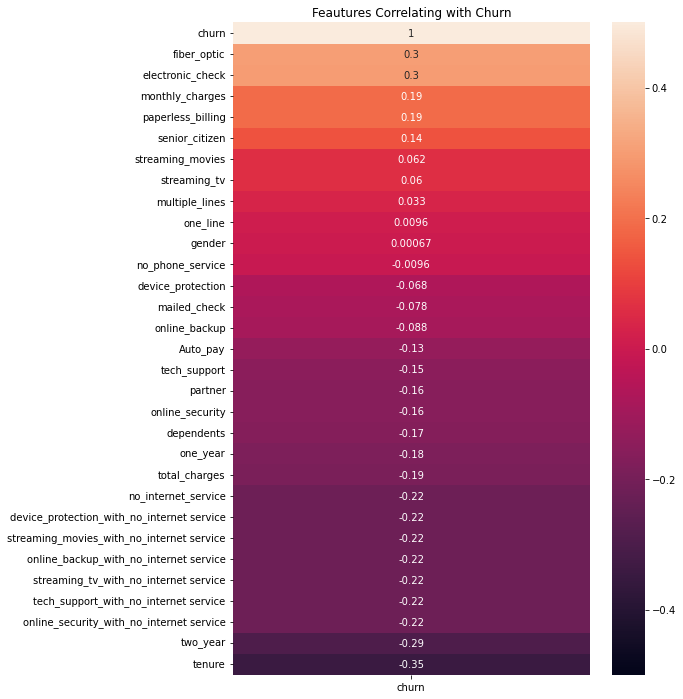

In [36]:
train.describe().T

count         mean          std  \
senior_citizen                              3943.0     0.162820     0.369248   
tenure                                      3943.0    32.473244    24.551176   
monthly_charges                             3943.0    65.328937    30.261023   
total_charges                               3943.0  2310.297451  2282.121687   
gender                                      3943.0     0.509003     0.499982   
partner                                     3943.0     0.486685     0.499886   
dependents                                  3943.0     0.307634     0.461573   
one_line                                    3943.0     0.907431     0.289864   
no_phone_service                            3943.0     0.092569     0.289864   
multiple_lines                              3943.0     0.430383     0.495193   
online_security_with_no_internet service    3943.0     0.215318     0.411095   
online_security                             3943.0     0.291149     0.454350   
online_backup_with_no_internet service      3943.0     0.215318     0.411095   
online_backup                               3943.0     0.353031     0.477973   
device_protection_with_no_internet service  3943.0     0.215318     0.411095   
device_protection                           3943.0     0.355567     0.478745   
tech_support_with_no_internet service       3943.0     0.215318     0.411095   
tech_support                                3943.0     0.292924     0.455162   
streaming_tv_with_no_internet service       3943.0     0.215318     0.411095   
streaming_tv                                3943.0     0.393609     0.488612   
streaming_movies_with_no_internet service   3943.0     0.215318     0.411095   
streaming_movies                            3943.0     0.396906     0.489318   
paperless_billing                           3943.0     0.594725     0.491007   
churn                                       3943.0     0.265280     0.441538   
one_year                                    3943.0     0.215318     0.411095   
two_year                                    3943.0     0.234339     0.423639   
Auto_pay                                    3943.0     0.219376     0.413876   
electronic_check                            3943.0     0.336799     0.472676   
mailed_check                                3943.0     0.222419     0.415924   
fiber_optic                                 3943.0     0.442556     0.496752   
no_internet_service                         3943.0     0.215318     0.411095   

                                              min      25%      50%      75%  \
senior_citizen                               0.00    0.000     0.00     0.00   
tenure                                       0.00    9.000    29.00    55.00   
monthly_charges                             18.25   35.900    70.55    90.25   
total_charges                                0.00  413.125  1404.65  3910.00   
gender                                       0.00    0.000     1.00     1.00   
partner                                      0.00    0.000     0.00     1.00   
dependents                                   0.00    0.000     0.00     1.00   
one_line                                     0.00    1.000     1.00     1.00   
no_phone_service                             0.00    0.000     0.00     0.00   
multiple_lines                               0.00    0.000     0.00     1.00   
online_security_with_no_internet service     0.00    0.000     0.00     0.00   
online_security                              0.00    0.000     0.00     1.00   
online_backup_with_no_internet service       0.00    0.000     0.00     0.00   
online_backup                                0.00    0.000     0.00     1.00   
device_protection_with_no_internet service   0.00    0.000     0.00     0.00   
device_protection                            0.00    0.000     0.00     1.00   
tech_support_with_no_internet service        0.00    0.000     0.00     0.00   
tech_support                                

<AxesSubplot:>

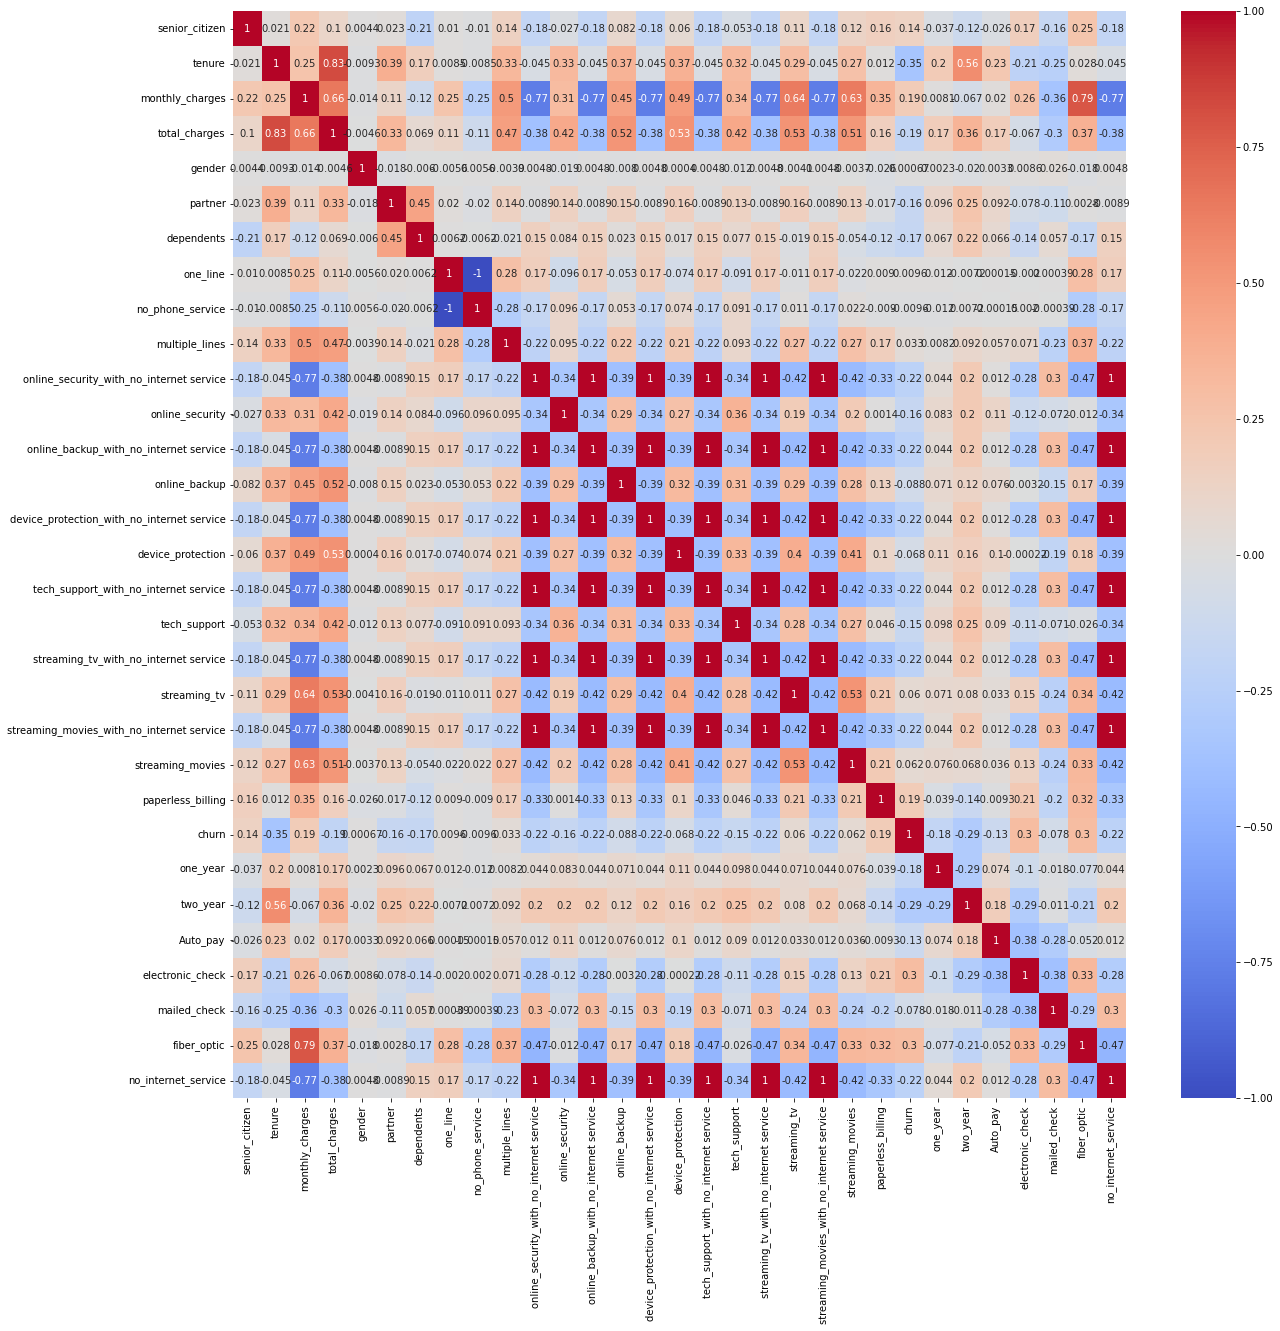

In [40]:
#Try to narrow down more
plt.figure(figsize=(20,20))
sns.heatmap(train.corr() , cmap='coolwarm', center=0, annot=True)

In [50]:
#Checking the columns that has correlation more than -.22
list(cols[cols < (-.20)].index)

['no_internet_service',
 'device_protection_with_no_internet service',
 'streaming_movies_with_no_internet service',
 'online_backup_with_no_internet service',
 'streaming_tv_with_no_internet service',
 'tech_support_with_no_internet service',
 'online_security_with_no_internet service',
 'two_year',
 'tenure']

In [49]:
#Same thing as above
list(cols[cols > .02].index)

['churn',
 'fiber_optic',
 'electronic_check',
 'monthly_charges',
 'paperless_billing',
 'senior_citizen',
 'streaming_movies',
 'streaming_tv',
 'multiple_lines']

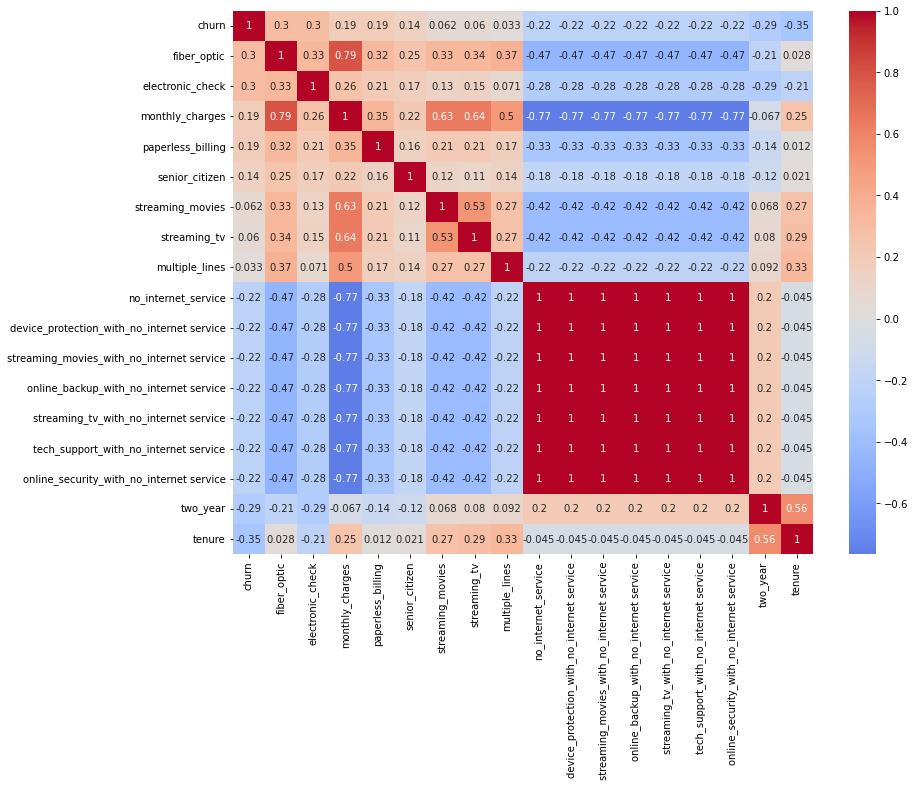

In [48]:
#Little better but still a busy heatmap
col_listf = list(cols[cols > .02].index) + list(cols[cols < (-.20)].index)
col_listf

plt.figure(figsize=(13,10))
sns.heatmap(train[col_listf].corr() , cmap='coolwarm', center=0, annot=True)

plt.title('')
plt.show()

Takeaways

churn has positive correlation:

- monhtly charges
- internet type : fiber_optic
- payment type: electronic check

churn has negative correlation:

- no_internet_service
- tenure
- tech_suport
- online_security

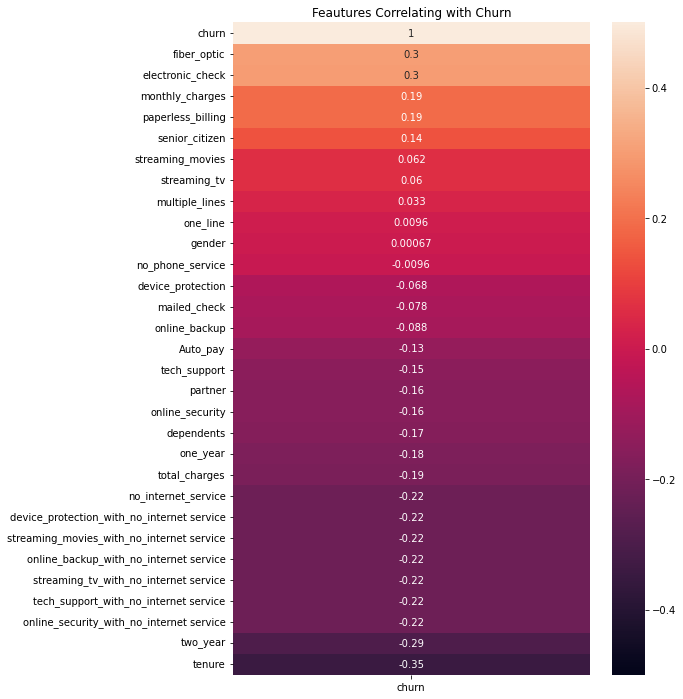

In [54]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(train.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures Correlating with Churn')
plt.show()

<AxesSubplot:title={'center':'Feautures Correlating with Churn'}>

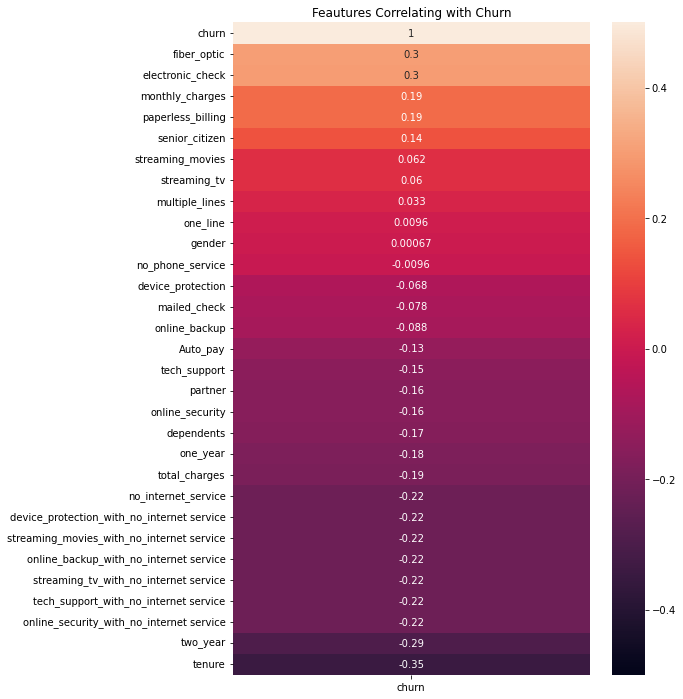

In [32]:
def get_churn_heatmap(df):
    plt.figure(figsize=(8,12))
    churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-.5, vmax=.5, annot=True)
    churn_heatmap.set_title('Feautures Correlating with Churn')
    
    return churn_heatmap

<AxesSubplot:title={'center':'Feautures Correlating with Churn'}>

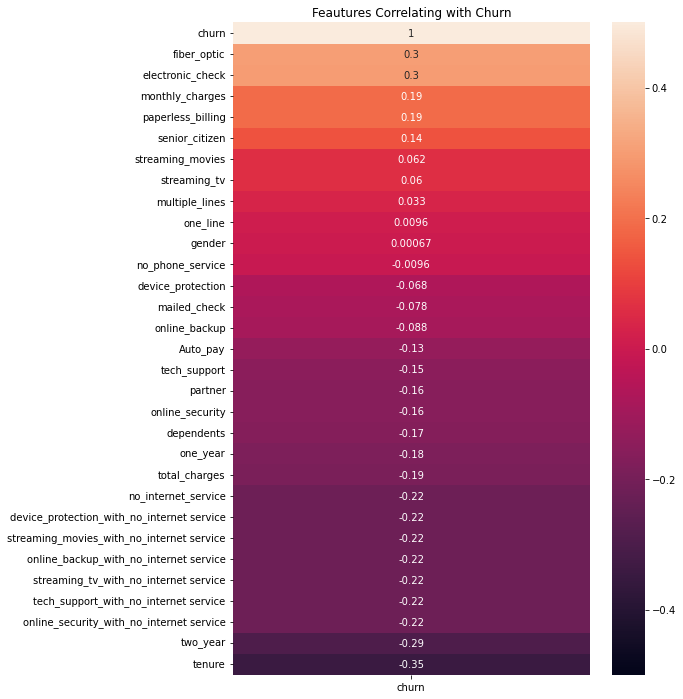

In [55]:
get_churn_heatmap(train)

Text(0.5, 0, 'Tenure (in months)')

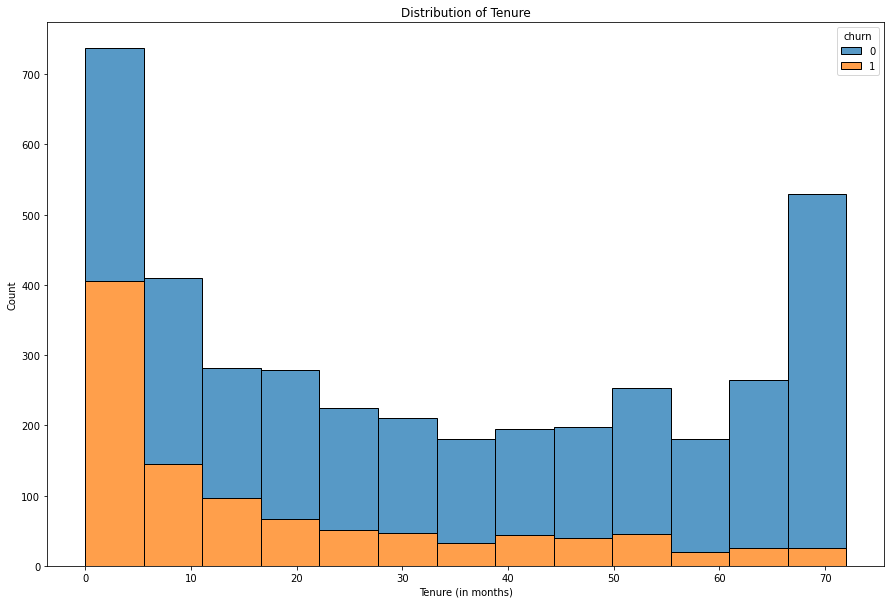

In [66]:
plt.figure(figsize=(15,10))
# Distribution of Tenure
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple='stack',        
             )

plt.title("Distribution of Tenure")
plt.xlabel('Tenure (in months)')

In [57]:
#Getting new customers
train[['monthly_charges','total_charges','tenure']][train['total_charges']== 0] 

monthly_charges  total_charges  tenure
2176            20.25            0.0       0
1731            20.00            0.0       0
945             56.05            0.0       0
4054            80.85            0.0       0
2855            73.35            0.0       0
5433            19.85            0.0       0
3118            52.55            0.0       0
2025            19.70            0.0       0

In [88]:
#Want to know how many customer in the first month
num_customer = train.tenure[train['tenure']== 1].count()
num_customer

333

In [86]:
#From the graph above, check how many customer have churned in the first month
first_month = train[['monthly_charges','tenure', 'churn','electronic_check','paperless_billing','fiber_optic']][train['tenure']== 1]
first_month.count()

monthly_charges      333
tenure               333
churn                333
electronic_check     333
paperless_billing    333
fiber_optic          333
dtype: int64

In [92]:
churned = first_month.churn[first_month['churn'] == 1].count()
churned

212

In [90]:
print(f"churn rate in the first month of Tenure: {(churned/num_customer):.2%}")

churn rate in the first month of Tenure: 63.66%


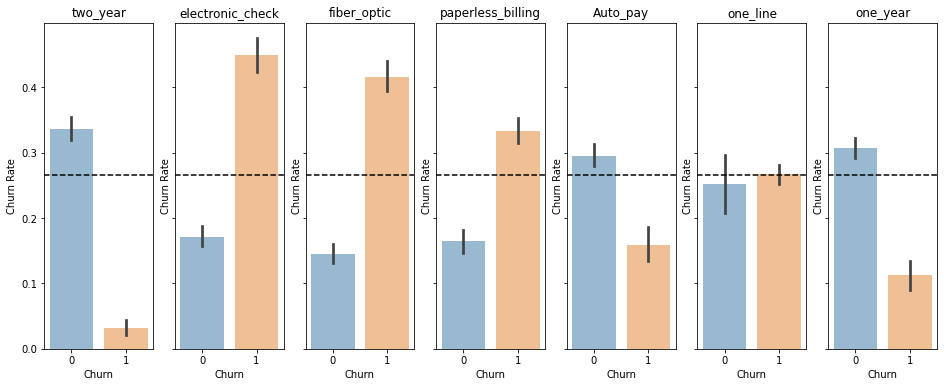

In [111]:
#enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element

features = ['two_year', 'electronic_check','fiber_optic','paperless_billing', 'Auto_pay','one_line','one_year']


_, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='black')

Take Away:
   - We can see a high churned rate on electronic check, paperless_billing and fiber_optic
   - And customer who has phone service that is one line, has about the same churned rate as the customer didnt churned